# MODEL BUILDING
----
#### Demonstrating a statistically significant strong negative linear correlational relationship between the number of available auto- and assisted propulsion transportation units by MobiBikes, and the number of empty storage slots at the Mobibikes stations throughout Vancouver, BC, Canada, using a simple linear regression analysis.
----

In [124]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [125]:
df = pd.read_csv('data/df0.csv')

print(df.shape)
print(df.dtypes)
df.head(5)

(2405, 14)
st_id              int64
slots              int64
empty              int64
available          int64
status             int64
Unique ID          int64
time_of_query      int64
cat_id           float64
distance           int64
popularity       float64
price            float64
open_now           int64
rating           float64
rating_count     float64
dtype: object


,st_id,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
0,1,35,16,19,1,1,17,13034.0,57,0.221702,1.0,1,8.0,55.0
1,1,35,16,19,1,1,17,13034.0,96,0.953849,2.0,1,8.2,111.0
2,1,35,16,19,1,1,17,11064.0,128,0.785993,0.0,0,8.3,12.0
3,1,35,16,19,1,1,17,11046.0,48,0.944987,0.0,1,7.2,8.0
4,1,35,16,19,1,1,17,13306.0,164,0.954043,2.0,0,8.7,367.0


In [126]:
df['open_now'].sum()
# At the time this data set was sampled, there were only about 20% of the nearby venues open
# df = df[df.open_now != False]
df.shape

(2405, 14)

In [127]:
df.count()

st_id            2405
slots            2405
empty            2405
available        2405
status           2405
Unique ID        2405
time_of_query    2405
cat_id           2405
distance         2405
popularity       2405
price            2405
open_now         2405
rating           2405
rating_count     2405
dtype: int64

In [128]:
df.groupby('st_id').sum().sort_values(['rating', 'distance'], ascending = False)

,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
st_id,,,,,,,,,,,,,
79,180,180,0,10,790,170,127099.0,1665,9.525252,15.0,2,86.7,1457.0
5,260,80,180,10,50,170,128542.0,1953,9.371446,10.0,5,85.7,3094.0
138,180,140,40,10,1380,170,127341.0,1601,9.506131,18.0,1,85.7,1463.0
201,180,20,160,10,2010,170,131765.0,1417,9.709741,14.0,5,85.7,2079.0
314,160,70,90,10,3140,170,142261.0,2867,9.385199,10.0,3,85.5,2506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,160,10,150,10,2190,170,142481.0,2920,7.537961,6.0,2,38.9,336.0
100,198,108,90,9,900,153,135682.0,1732,6.909018,5.0,1,38.3,279.0
102,160,140,20,10,1020,170,164349.0,1530,8.072774,0.0,1,26.0,181.0


In [129]:
# df = df[df.open_now != False]
df.shape

(2405, 14)

In [130]:
df.head()

,st_id,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
0,1,35,16,19,1,1,17,13034.0,57,0.221702,1.0,1,8.0,55.0
1,1,35,16,19,1,1,17,13034.0,96,0.953849,2.0,1,8.2,111.0
2,1,35,16,19,1,1,17,11064.0,128,0.785993,0.0,0,8.3,12.0
3,1,35,16,19,1,1,17,11046.0,48,0.944987,0.0,1,7.2,8.0
4,1,35,16,19,1,1,17,13306.0,164,0.954043,2.0,0,8.7,367.0


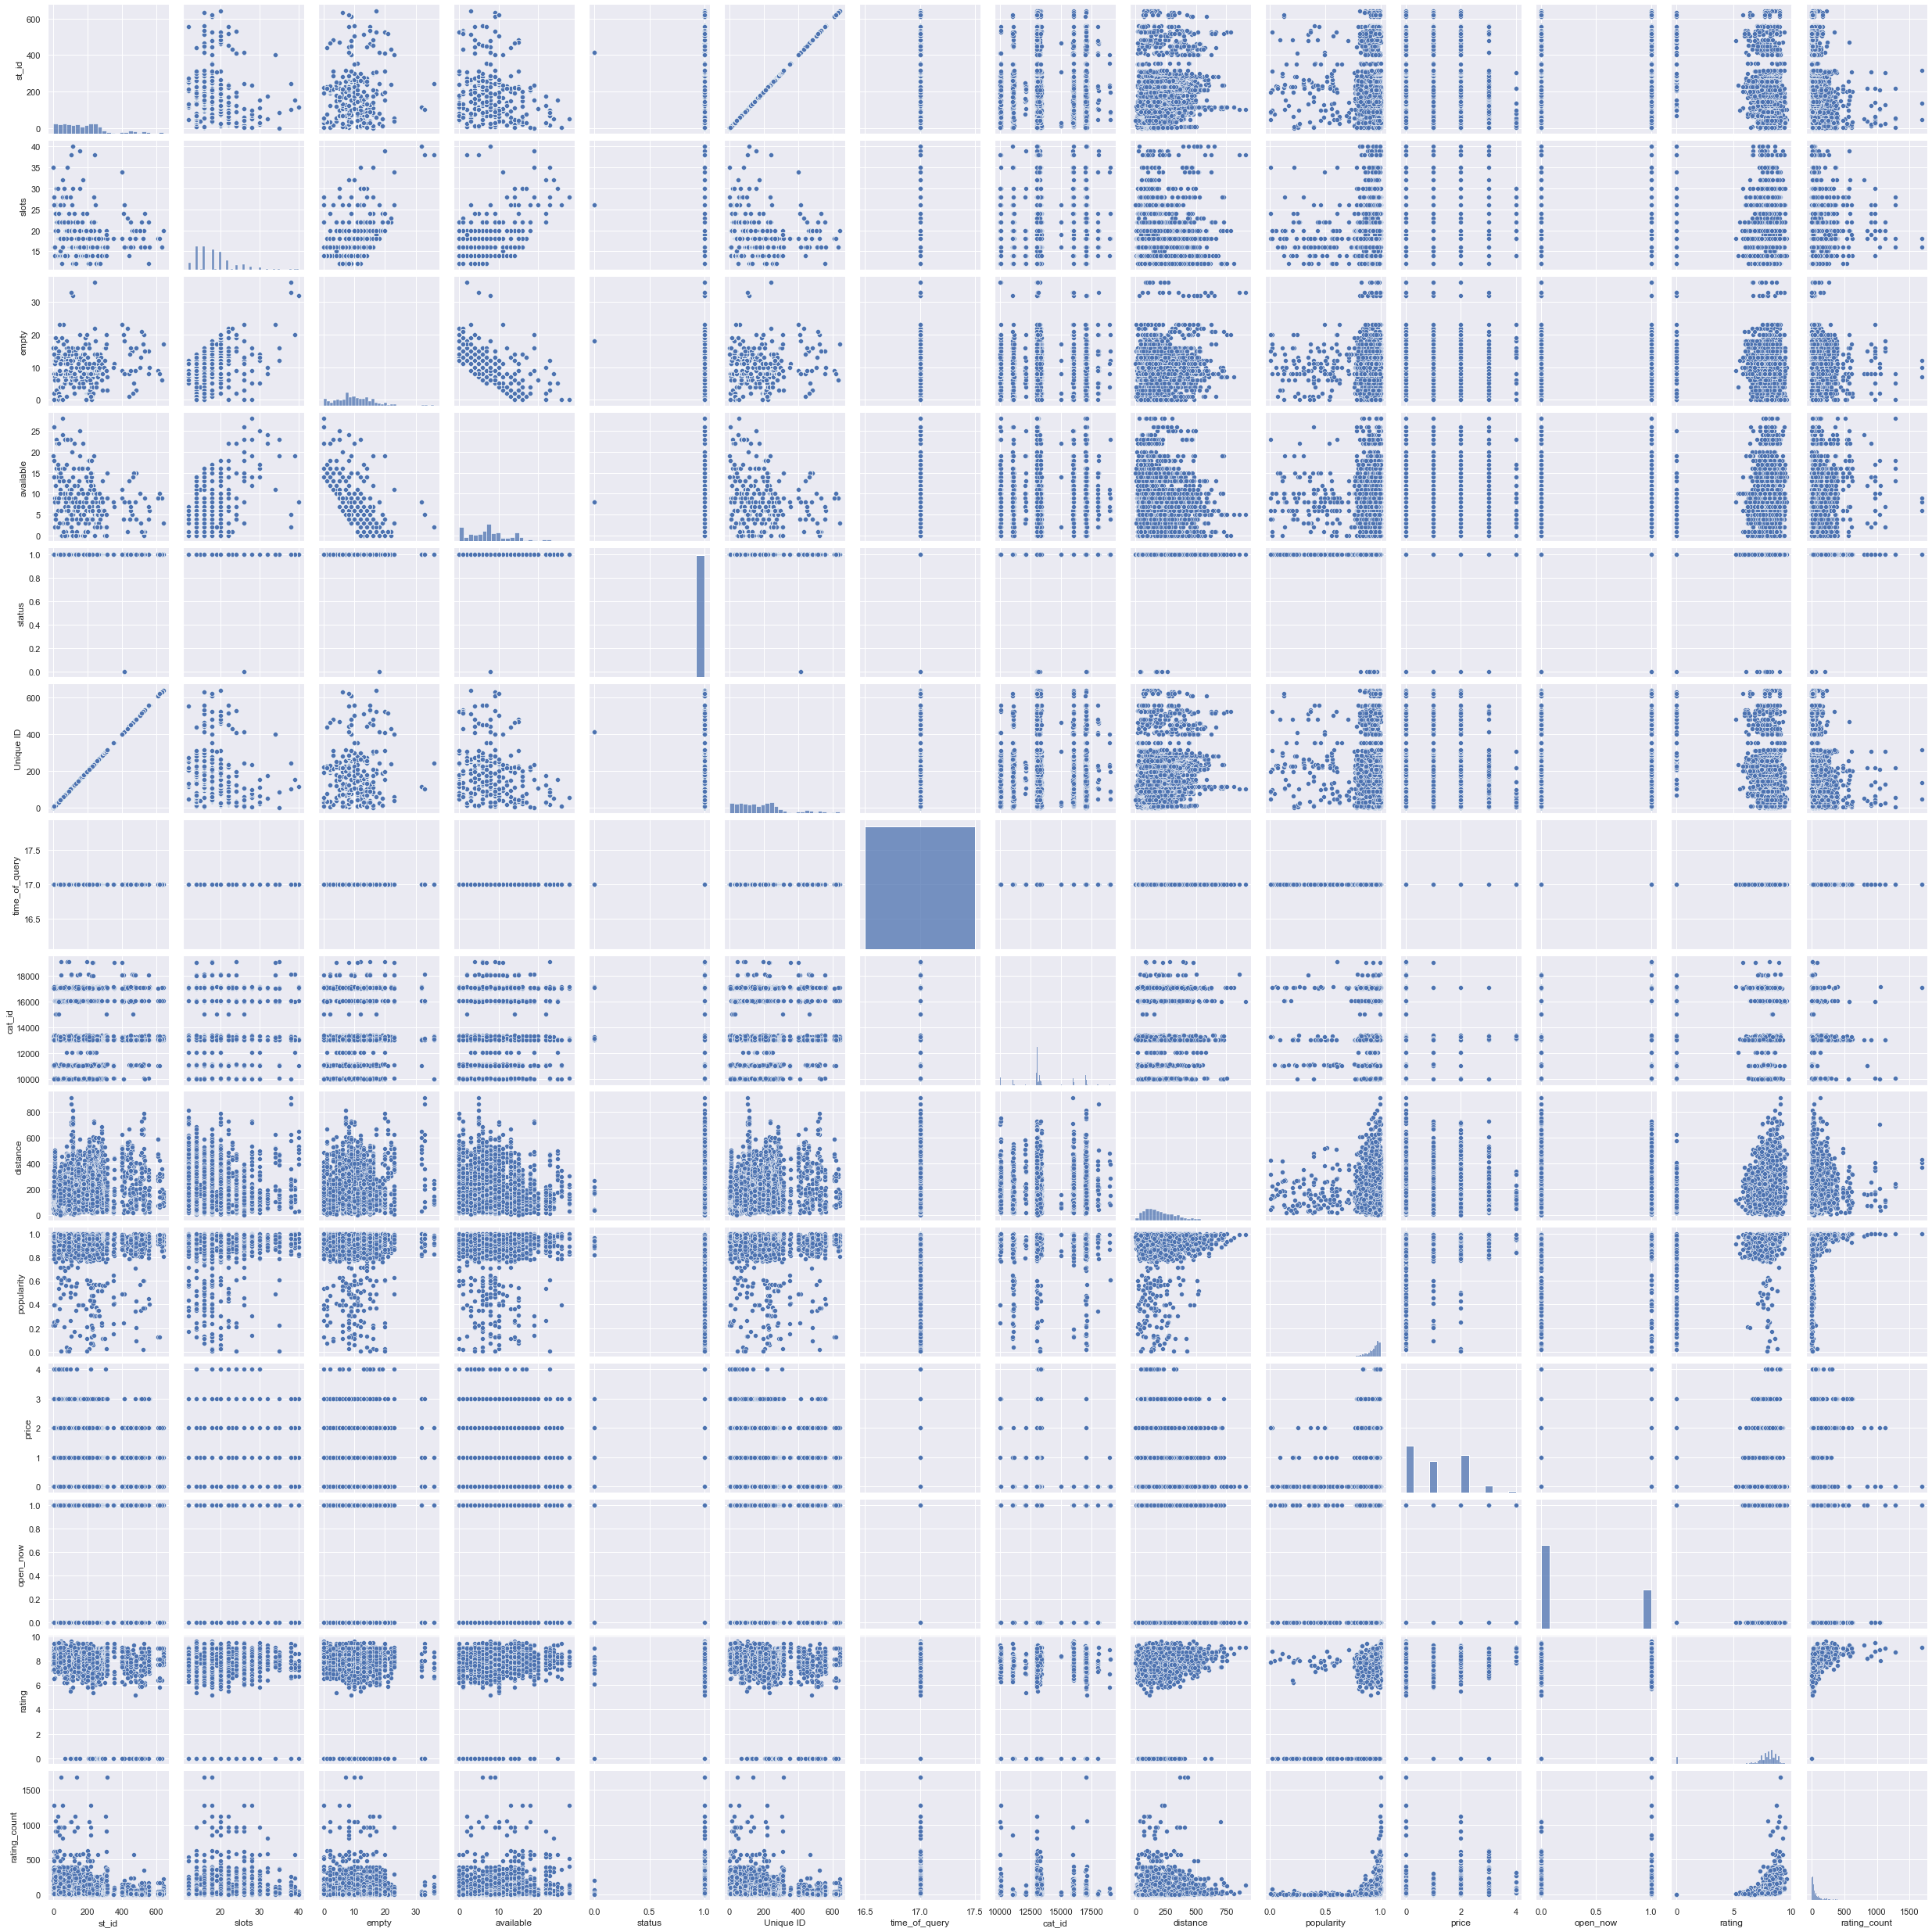

In [132]:


sns.pairplot(data=df)
plt.show()

In [133]:
# Remove unhelpful columns:
df = df.drop(['status', 'time_of_query', 'open_now', 'Unique ID'], axis=1)
df.head(3)

,st_id,slots,empty,available,cat_id,distance,popularity,price,rating,rating_count
0,1,35,16,19,13034.0,57,0.221702,1.0,8.0,55.0
1,1,35,16,19,13034.0,96,0.953849,2.0,8.2,111.0
2,1,35,16,19,11064.0,128,0.785993,0.0,8.3,12.0


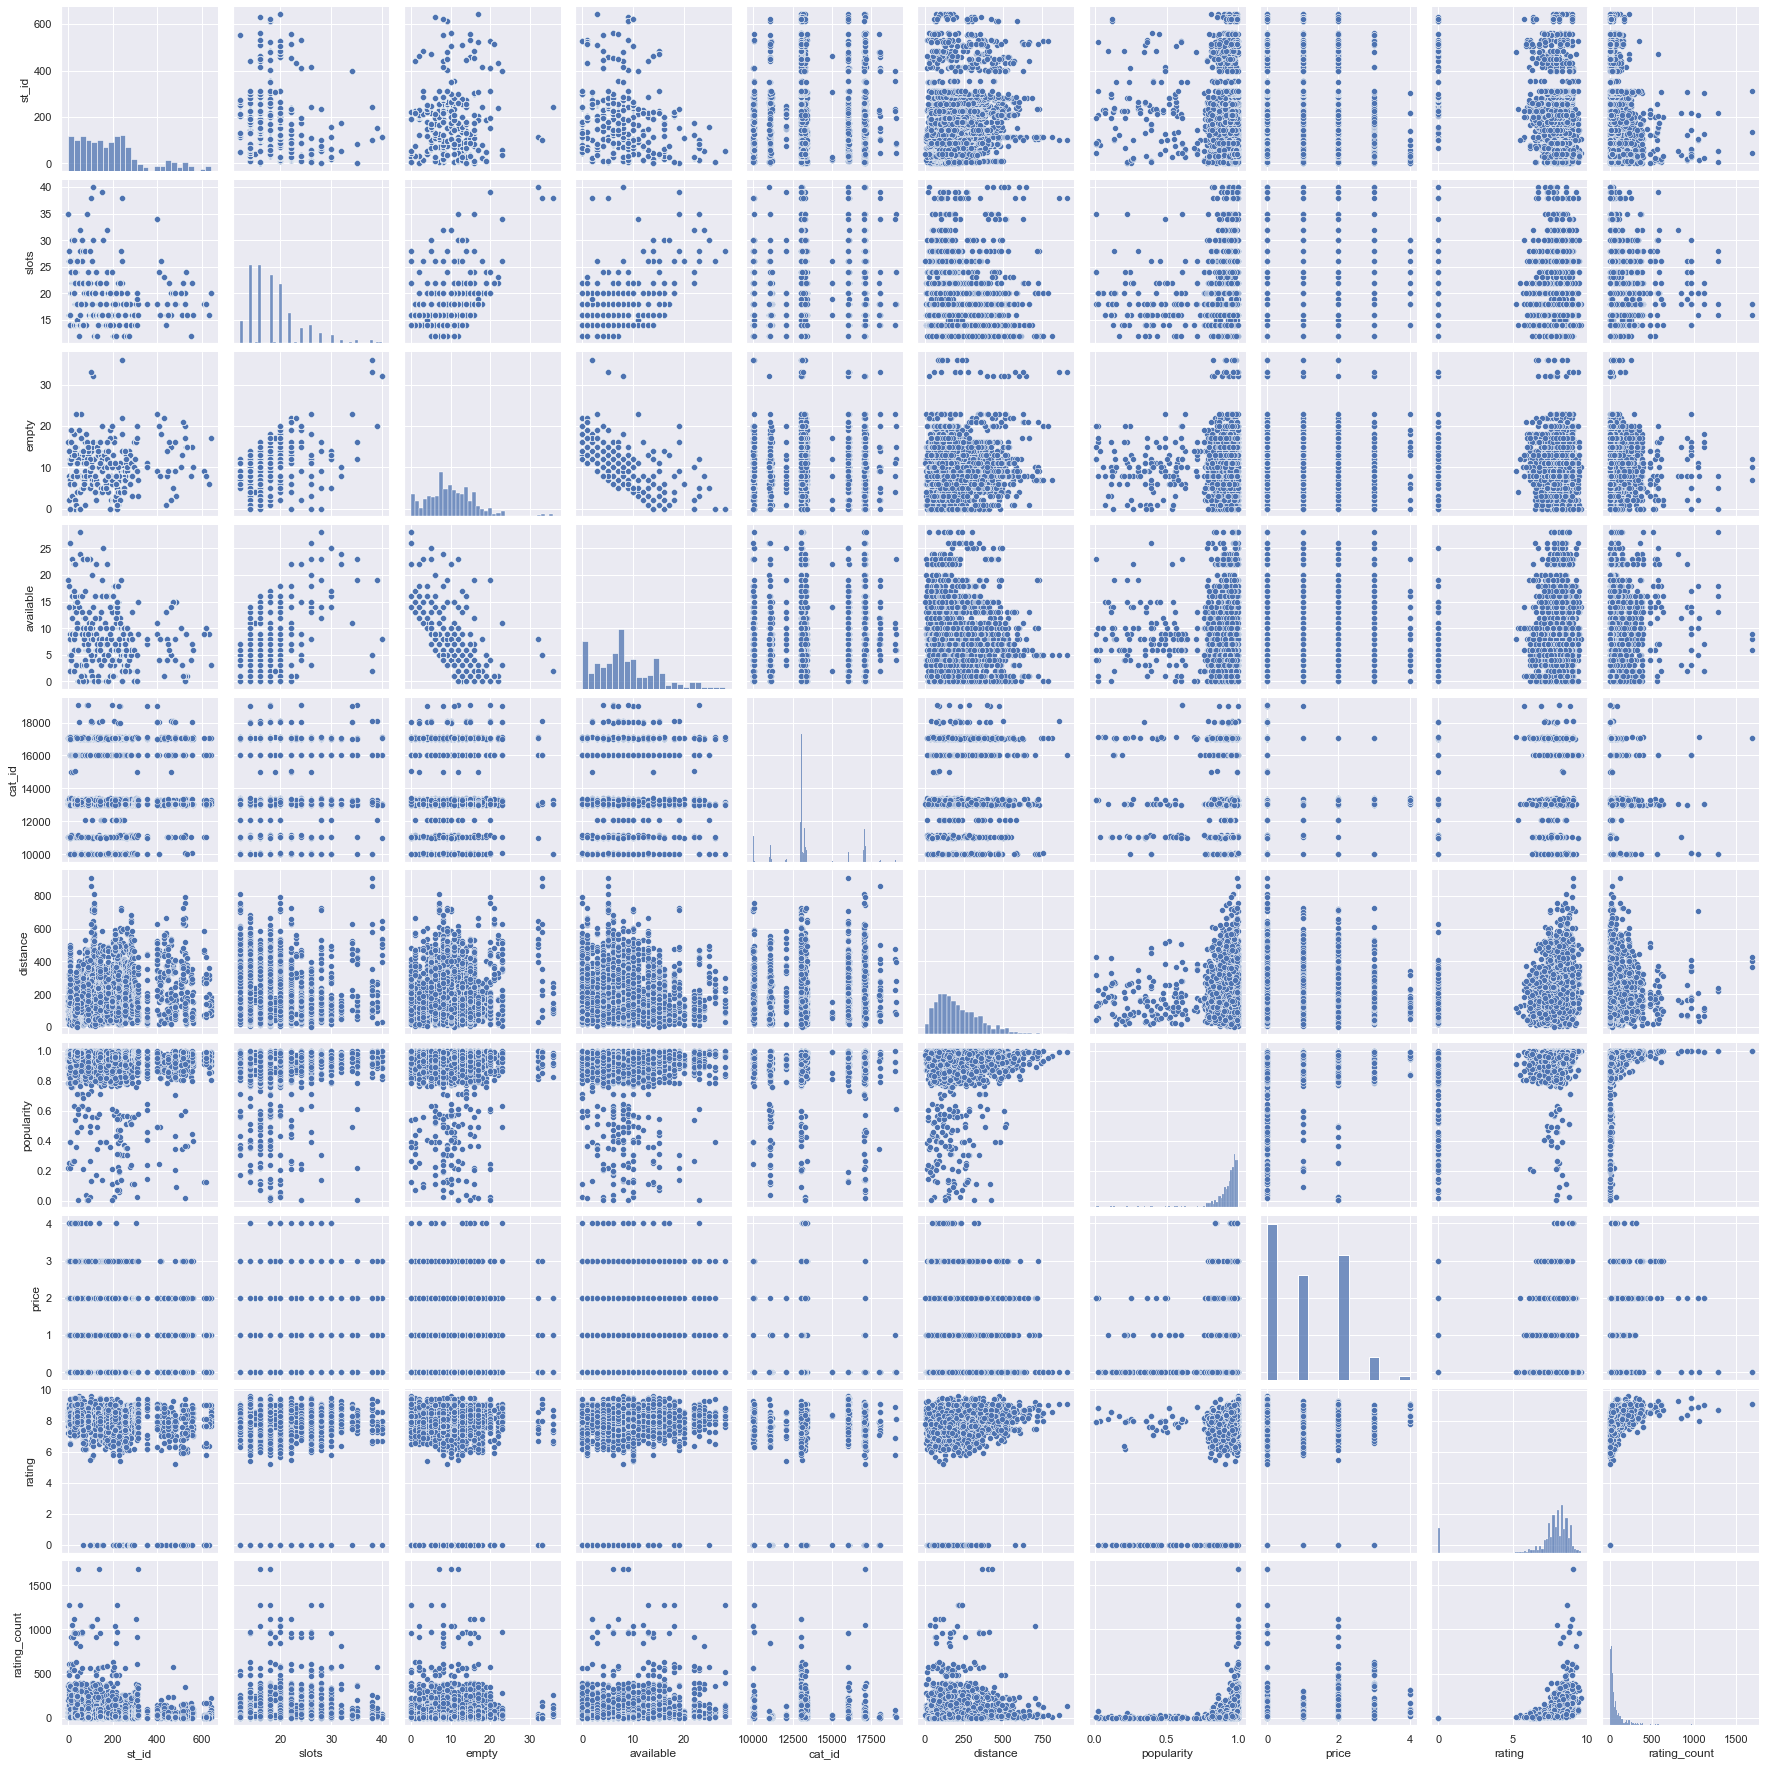

In [134]:
sns.pairplot(data=df)
plt.show()

Even with the closer look there is little evidence of any obvious linear relationships between the two data sets. 

<AxesSubplot: >

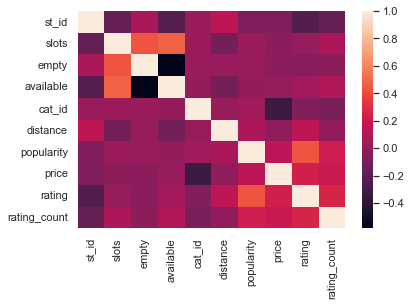

In [135]:
sns.heatmap(df.corr())

The heat map above effectively further illustrates the absence of any meaningful correlations between dataset pairs in the lower left and upper right quadrants.  Since these are the regions which illustrate the correlational cross-analysis between the different data sets acquired from CityBik.es API and Foursquare APIs. 

In [136]:
df.corr()

,st_id,slots,empty,available,cat_id,distance,popularity,price,rating,rating_count
st_id,1.000000,-0.164883,0.085374,-0.232029,0.019640,0.155233,-0.075110,-0.073498,-0.239916,-0.174599
slots,-0.164883,1.000000,0.432809,0.475117,0.032262,-0.113026,0.033542,-0.023791,0.010107,0.093486
empty,0.085374,0.432809,1.000000,-0.585093,0.024199,0.019197,0.025528,-0.031208,-0.046281,-0.028252
available,-0.232029,0.475117,-0.585093,1.000000,0.006380,-0.119033,0.005330,0.009514,0.055570,0.113851
cat_id,0.019640,0.032262,0.024199,0.006380,1.000000,0.020786,0.049453,-0.331449,-0.062179,-0.090311
distance,0.155233,-0.113026,0.019197,-0.119033,0.020786,1.000000,0.088461,-0.013699,0.153552,-0.005607
popularity,-0.075110,0.033542,0.025528,0.005330,0.049453,0.088461,1.000000,0.149386,0.432402,0.222826
price,-0.073498,-0.023791,-0.031208,0.009514,-0.331449,-0.013699,0.149386,1.000000,0.233067,0.199643
rating,-0.239916,0.010107,-0.046281,0.055570,-0.062179,0.153552,0.432402,0.233067,1.000000,0.259082
rating_count,-0.174599,0.093486,-0.028252,0.113851,-0.090311,-0.005607,0.222826,0.199643,0.259082,1.000000


In [137]:
# Removing all remaining data columns except for the bike slot related values since they were showing only weak or no meaningful correlations.

df = df.drop(['st_id', 'cat_id','distance', 'popularity', 'price', 'rating', 'rating_count'], axis=1)
df.corr()

,slots,empty,available
slots,1.000000,0.432809,0.475117
empty,0.432809,1.000000,-0.585093
available,0.475117,-0.585093,1.000000


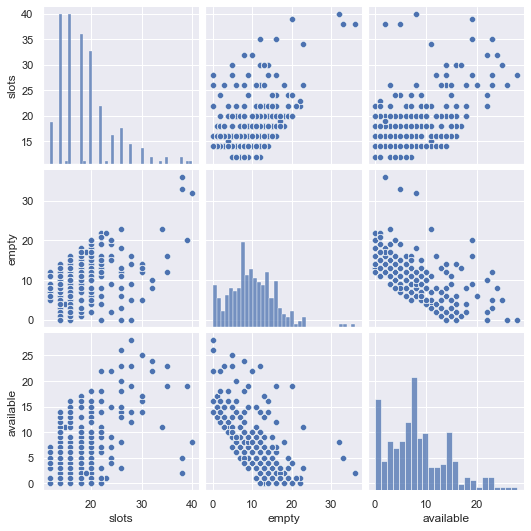

In [138]:
sns.pairplot(data=df)
plt.show()

----
### Working with what we can, to build a linear regression model with the currently available data:
----

Analyzing the negative linear correlational relationship between the available bikes and e-bikes, and the empty bike slots at the Mobibikes stations throughout Vancouver BC.

In [139]:
# Standardization by the calculating the percent of citybikes units available:
avail = df['available']/df['slots']*100

In [140]:
# Add the new column into the dataframe and confirm the addition
df.insert(3, 'prc_avail', avail, False)
df.head(5)

,slots,empty,available,prc_avail
0,35,16,19,54.285714
1,35,16,19,54.285714
2,35,16,19,54.285714
3,35,16,19,54.285714
4,35,16,19,54.285714


In [141]:
# Trying the metric of percent of citybikes slots which are empty:
empty = df['empty']/df['slots']*100

In [142]:
# Add the new column into the dataframe and confirm the addition
df.insert(3, 'prc_empty', empty, False)
df.corr()

,slots,empty,available,prc_empty,prc_avail
slots,1.000000,0.432809,0.475117,-0.094910,0.093429
empty,0.432809,1.000000,-0.585093,0.822860,-0.820879
available,0.475117,-0.585093,1.000000,-0.885903,0.887829
prc_empty,-0.094910,0.822860,-0.885903,1.000000,-0.997060
prc_avail,0.093429,-0.820879,0.887829,-0.997060,1.000000


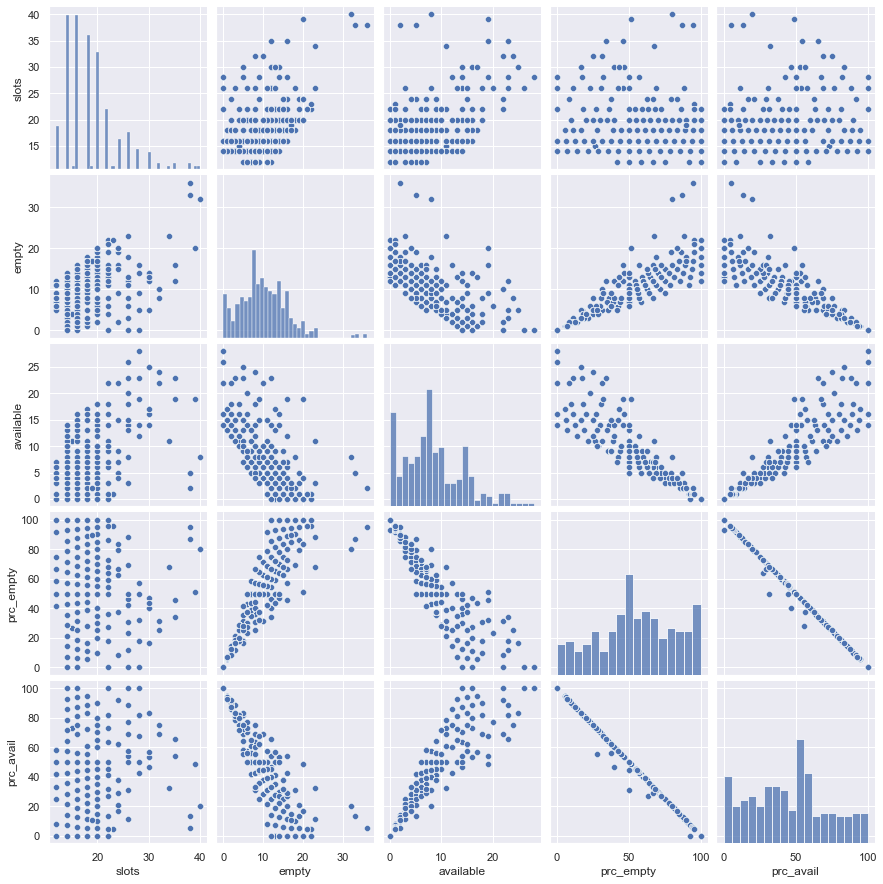

In [143]:
sns.pairplot(data=df)
plt.show()

In [144]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['available'], df['slots'])
stat, p2 = scipy.stats.pearsonr(df['available'], df['empty'])
print(p1, p2)

1.0820090978824814e-135 5.9948879182432e-221


Provide model output and an interpretation of the results. 

In [145]:
y = df['empty']
X = df['available']
X = sm.add_constant(X)

X.head()

,const,available
0,1.0,19
1,1.0,19
2,1.0,19
3,1.0,19
4,1.0,19


In [146]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  empty   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          5.99e-221
Time:                        16:16:26   Log-Likelihood:                -7138.0
No. Observations:                2405   AIC:                         1.428e+04
Df Residuals:                    2403   BIC:                         1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1642      0.168     90.449      0.0

In [147]:
residuals = results.resid
residuals

0       11.694663
1       11.694663
2       11.694663
3       11.694663
4       11.694663
          ...    
2400    -0.163543
2401    -0.163543
2402    -0.163543
2403    -0.163543
2404    -0.163543
Length: 2405, dtype: float64

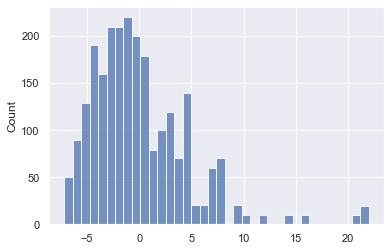

In [148]:
sns.histplot(residuals)
plt.show()

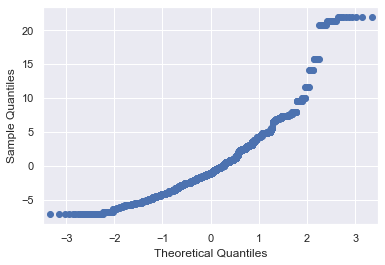

In [149]:
sm.qqplot(residuals)
plt.show()

In [150]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.8911756277084351, pvalue=3.113530484379282e-38)

NameError: name 'ax' is not defined

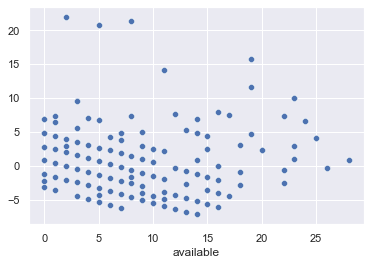

In [151]:
an = sns.scatterplot(x=df['available'], y = residuals)
ax.axhline(0)

# Stretch

How can you turn the regression model into a classification model?